<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_25_Regresi%C3%B3n_con_Datos_Categ%C3%B3ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

In [56]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***1. Carga de datos***

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:



In [57]:
df = pd.read_csv('/content/drive/MyDrive/Unidad04/college.csv', engine='python', usecols=['salary', 'cost', 'location'])
df.head()

,salary,cost,location
0,119000,189300,NE
1,121000,189600,NE
2,123000,188400,NE
3,123000,188700,NE
4,110000,194200,NE


**Convierte si es necesario la variable location a tipo de dato categórico**

In [58]:
df.dtypes

,0
salary,int64
cost,int64
location,object


In [59]:
df['location'] = df['location'].astype('category')
df.dtypes

,0
salary,int64
cost,int64
location,category


**Usa la instrucción describe() en las variables salary y cost**

In [60]:
df[['salary', 'cost']].describe()

,salary,cost
count,85.000000,85.000000
mean,95898.823529,142434.470588
std,11937.121912,53913.064578
min,74900.000000,18260.000000
25%,87100.000000,84670.000000
50%,93200.000000,169200.000000
75%,105000.000000,188700.000000
max,123000.000000,227300.000000


**Cuenta la cantidad de datos que hay por categoría en location**

In [61]:
df['location'].value_counts()

,count
location,
NE,25
W,21
S,20
MW,19


**Convierte la variable location usando one-hot encoding**

In [62]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[['location']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['location']))
df = pd.concat([df, encoded_df], axis=1)
df

,salary,cost,location,location_NE,location_S,location_W
0,119000,189300,NE,1.0,0.0,0.0
1,121000,189600,NE,1.0,0.0,0.0
2,123000,188400,NE,1.0,0.0,0.0
3,123000,188700,NE,1.0,0.0,0.0
4,110000,194200,NE,1.0,0.0,0.0
...,...,...,...,...,...,...
80,79300,74070,W,0.0,0.0,1.0
81,80100,69800,W,0.0,0.0,1.0
82,74900,169200,W,0.0,0.0,1.0
83,84500,56970,W,0.0,0.0,1.0


# ***2. Análisis Exploratorio de los Datos***

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.



**Crea un histograma de la columna salary. Discute lo que observas**

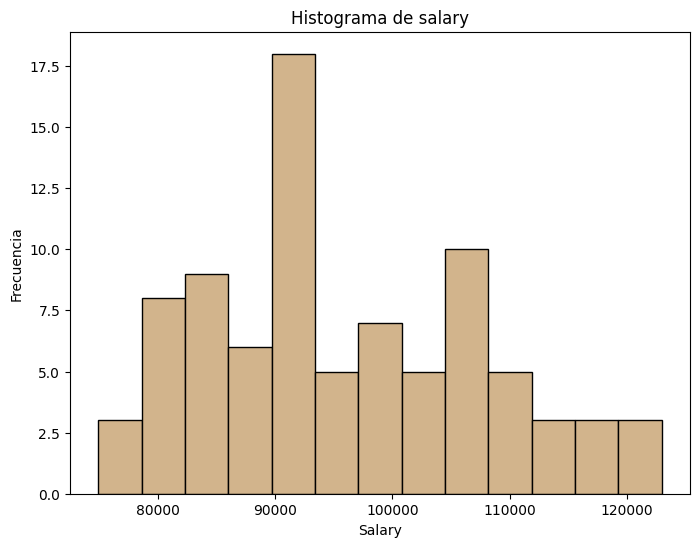

In [63]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary'], bins=13, edgecolor='black', color='tan')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.title('Histograma de salary')
plt.show()

En el histograma se observa que la distribución parece asimétrica (ligeramente sesgada a la derecha), aunque no evidente. Existe una concentración de salarios en el rango de los 90,000 con un pico bastante claro y es el intervalo con mayor frecuencia, lo que sugiere que es la Moda. Además, el salario mínimo está alrededor de 75,000 y el máximo ronda en los 122,000.

**Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas**

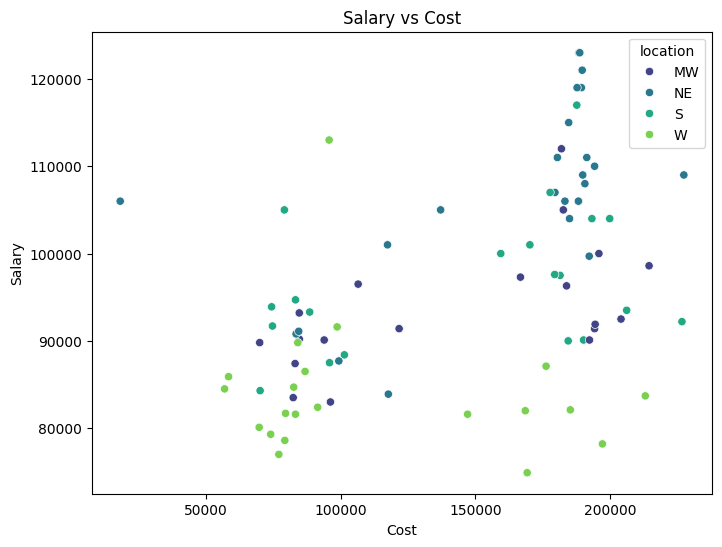

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cost', y='salary', hue='location', palette='viridis')
plt.xlabel('Cost')
plt.ylabel('Salary')
plt.title('Salary vs Cost')
plt.show()

En el diagrama se puede observar que no hay una correlación claramente lineal entre salary y cost, en otras palabras quiere decir que a mayor costo no siempre le corresponde mayor salario. Además, hay una tendencia de que las regiones de mayor costo tienen los salarios más altos.

**Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas**

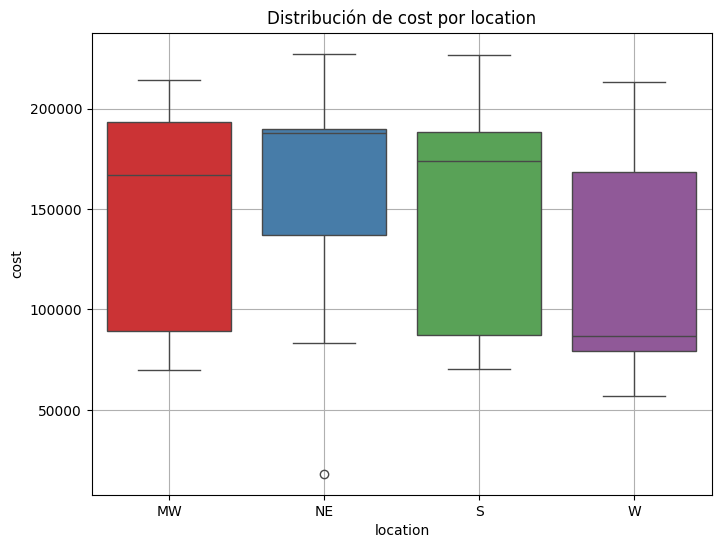

In [65]:
def obtener_ubicacion(row):
    if row['location_NE'] == 1.0:
        return 'NE'
    elif row['location_S'] == 1.0:
        return 'S'
    elif row['location_W'] == 1.0:
        return 'W'
    else:
        return 'MW'

df['ubicacion'] = df.apply(obtener_ubicacion, axis=1)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='location', y='cost',hue='location', palette='Set1')
plt.title("Distribución de cost por location")
plt.xlabel("location")
plt.ylabel("cost")
plt.grid(True)
plt.show()

En base a la gráfica se puede concluir que cost varía mucho dentro de location por ejemplo:

- NE y S tienen los costos más altos en mediana
- W tiene el costo más bajo en mediana, aunque con algunos posibles outliers altos
- MW es muy variables y cubre prácticamente todo el rango de costos

# ***3. Construcción del modelo de regresión***



**Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding**

In [66]:
x = df[['location_NE', 'location_S', 'location_W', 'cost']]
y = df['salary']

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

**Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos**

In [69]:
print(f"Intercepto (MW): {model.intercept_:.4f}")
print(f"location_NE: {model.coef_[0]:.4f}")
print(f"location_S : {model.coef_[1]:.4f}")
print(f"location_W : {model.coef_[2]:.4f}")
print(f"cost       : {model.coef_[3]:.4f}")

Intercepto (MW): 84988.7162
location_NE: 12032.8197
location_S : 2800.3450
location_W : -7721.4201
cost       : 0.0605


**Interpretación de los coeficientes**

**Intercepto (MW):** representa el salario promedio predicho para la región MW, cuando el costo es cero. Sirve como punto de referencia para comparar con las otras regiones.

**location_NE, location_S, location_W:** estos coeficientes representan la diferencia en el salario promedio predicho en las regiones NE, S, W y las de la región MW, manteniendo constante el costo. Por ejemplo, si el coeficiente de location_NE es positivo, significa que, para un mismo costo, en NE tiende a tener un salario promedio predicho más alto que MW.  Si el coeficiente es negativo, NE tiene un salario promedio predicho más bajo.

**cost:** Este coeficiente representa el cambio en el salario promedio predicho por cada unidad de aumento en el costo, manteniendo constante la ubicación. Si el coeficiente es positivo (lo cual es usual), significa que a mayor costo, se predice un mayor salario promedio.

# ***4. Análisis de Residuos***

**Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real)**

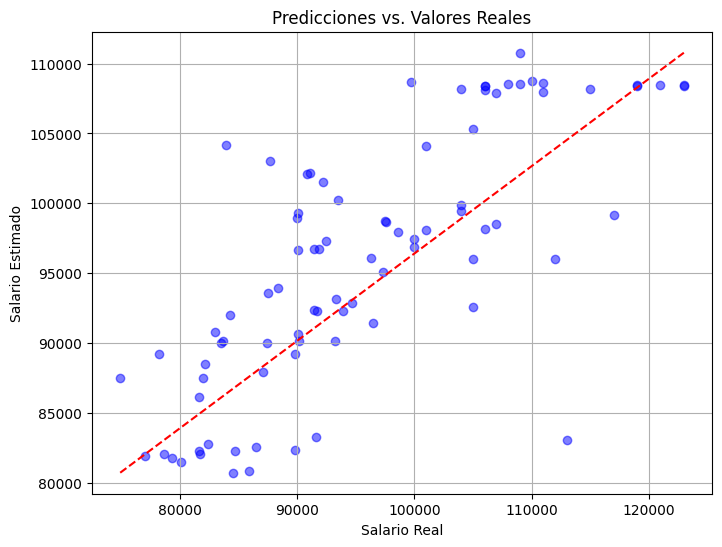

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.xlabel('Salario Real')
plt.ylabel('Salario Estimado')
plt.title('Predicciones vs. Valores Reales')
plt.grid(True)
plt.show()

**Crea una gráfica de los errores residuales. Discute lo que observas**

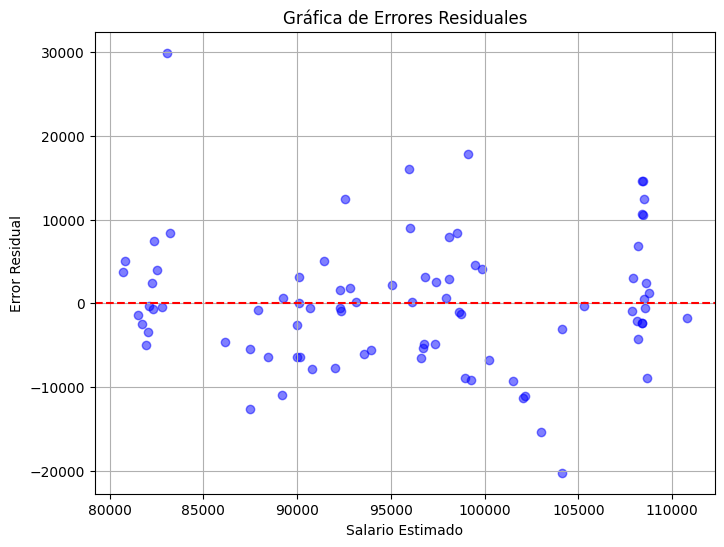

In [75]:
residuos = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Salario Estimado')
plt.ylabel('Error Residual')
plt.title('Gráfica de Errores Residuales')
plt.grid(True)
plt.show()

Se puede observar que los errores residuales están distribuidos tanto por encima como por debajo de la línea roja, la cual representa un error de 0. En general, no hay un patrón claro ni una curva definida, por lo que el modelo no tiene sesgo sistemático.

# ***5. Evalúa el modelo***


**Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test)**

In [72]:
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.4f}")

MSE: 60480269.1466


**Calcula el R² Score**

In [73]:
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.4f}")

R²: 0.5705


**Discute estos resultados obtenidos**

En base a los resultados obtenidos, se concluye que el modelo tiene un desempeño razonable pero no óptimo. Por ejemplo, en MSE se obtuvo un valor bastante alto lo que sugiere que el modelo comete errores grandes al predecir y R2 Score indica que la variabilidad es moderado, lo cual se considera aceptable pero no es excelente.

# ***6. Realiza un análisis de varianza con stastmodel***

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [74]:
model = ols('salary ~ C(location) + cost', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq    df          F        PR(>F)
C(location)  4.071774e+09   3.0  21.121259  3.570975e-10
cost         7.878166e+08   1.0  12.259774  7.600629e-04
Residual     5.140823e+09  80.0        NaN           NaN
